Question 3 - Phase of Flight Analysis

- Analyze the flight phases to determine if there are any patterns when most accidents/incidents occur.
- Create a detailed breakdown showing which phases of flight most events transpire.
- For each phase of flight, analyze the data across another dimension in the data to draw insights.

In [108]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
q3_df = pd.read_csv('NTSBAviationData.csv', encoding='latin1')

keep_cols = [
    'Event.Date', 'Investigation.Type', 'Broad.phase.of.flight',
    'Weather.Condition', 'Purpose.of.flight', 'Total.Fatal.Injuries'
]
q3_df = q3_df[keep_cols]

# rename
q3_df.rename(columns={
    'Broad.phase.of.flight': 'phase',
    'Weather.Condition': 'weather',
    'Purpose.of.flight': 'purpose',
    'Total.Fatal.Injuries': 'fatal_inj'
}, inplace=True)

# binary fatal flag (1 = fatal)
q3_df['fatal'] = (q3_df['fatal_inj'].fillna(0) > 0).astype(int)
q3_df = q3_df.dropna(subset=['phase'])
q3_df.head()

C:\Users\nawib\AppData\Local\Temp\ipykernel_23508\1307991319.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  q3_df = pd.read_csv('NTSBAviationData.csv', encoding='latin1')


,Event.Date,Investigation.Type,phase,weather,purpose,fatal_inj,fatal
0,1948-10-24,Accident,Cruise,UNK,Personal,2.0,1
1,1962-07-19,Accident,Unknown,UNK,Personal,4.0,1
2,1974-08-30,Accident,Cruise,IMC,Personal,3.0,1
3,1977-06-19,Accident,Cruise,IMC,Personal,2.0,1
4,1979-08-02,Accident,Approach,VMC,Personal,1.0,1


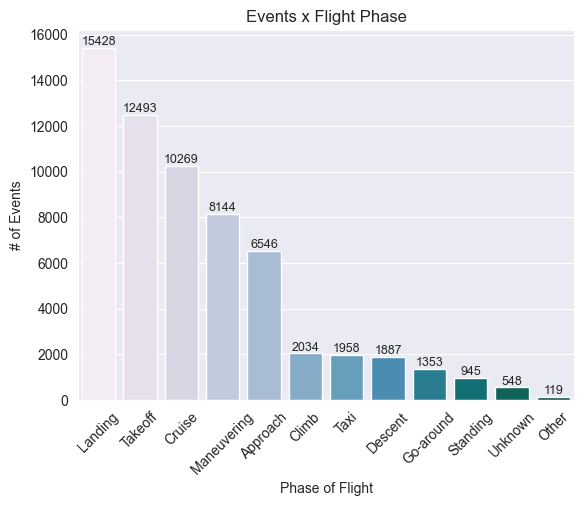

In [110]:
# incident count x flight dates
phase_counts = q3_df['phase'].value_counts().rename_axis('phase').reset_index(name='events')

bars = sns.barplot(data=phase_counts, x='phase', y='events', palette='PuBuGn')

# # for each bar
for bar in bars.patches:
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center', va='bottom', fontsize = 9
    )

# plot titles & visuals
plt.title('Events x Flight Phase')
plt.ylabel('# of Events')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.show()

**Explanation:

- Most of the incidents occurred during the Landing phase - exactly 15,428. This is followed closely by Takeoff, Cruising, Maneuvering, and Approaching
- The 5 phases of flight account for the vast majority of reported incidents in the dataset
- This suggests the flight phases which require the most movement, or human-controlled piloting (Landing, Takeoff, Maneuvering, Approaching) accounted for most incidents, with the only exception being Cruise.
- Climbing, Taxi, Descent all seem to be a rarer event, reflecting that these flight stages are safer.

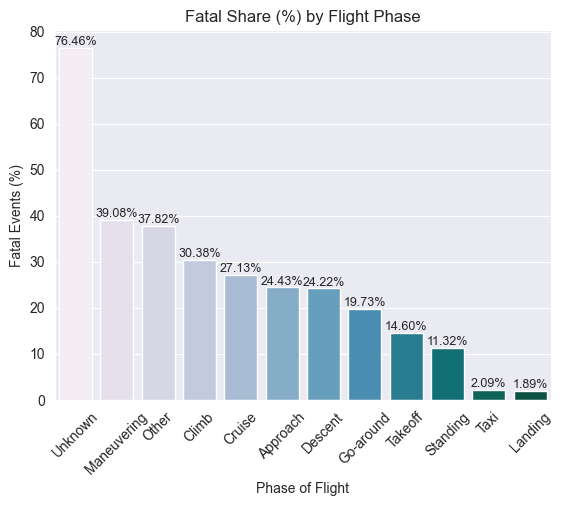

In [111]:
# % of fatal incidents by flight phase
fatal_pct = (
    q3_df.groupby('phase')['fatal']
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
    .reset_index()
)

# make plot
fatal_plot = sns.barplot(
    data=fatal_pct,
    x='phase',
    y='fatal',
    palette='PuBuGn'
)

# % labels to bars
for bar in fatal_plot.patches:
    fatal_plot.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}%',
        ha='center', va='bottom', fontsize = 9
    )

# plot titles/visual
plt.title('Fatal Share (%) by Flight Phase')
plt.ylabel('Fatal Events (%)')
plt.xlabel('Phase of Flight')
plt.xticks(rotation=45)
plt.show()


**Explanation:
- The phase that has the most fatalities is 'Unknown', which accounts for over 75% of all fatal events. This very likely means either the data is unavailable because it was destroyed in the fatal event, or there was an issue with the dataset.
- Maneuvering comes in next at 39.1%, Climb (30.4%) and Other (37.8%)
- Landing was marked as one of the highest incident-marked, but has a very low fatal share of 1.9%, maybe because it is at lower altitudes and speeds compared to Maneuvering, Climbing and Cruising.

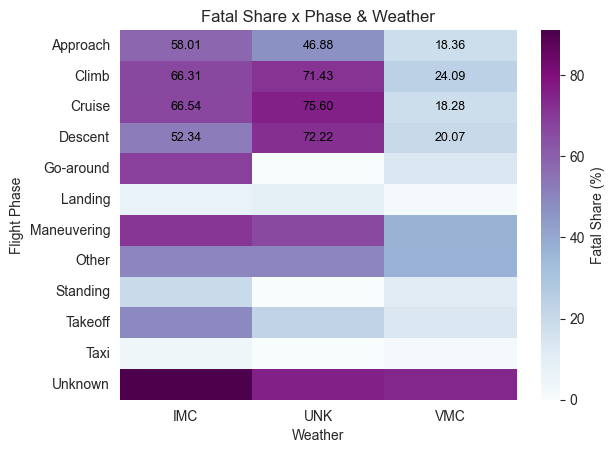

In [112]:
# % fatal grouped by phase & weather
fatal_phase_weather = (
    q3_df.groupby(['phase', 'weather'])['fatal']
    .mean()
    .mul(100)
    .round(2)
    .reset_index(name='fatal_pct')
)

# format for heatmap
heatmap_data = fatal_phase_weather.pivot(index='phase', columns='weather', values='fatal_pct')

# heatmap_data = heatmap_data.reindex(index=phase_order)

heatmap = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='BuPu',
    cbar_kws={'label': 'Fatal Share (%)'},
    annot_kws={'color': 'black', 'fontsize': 9}
)

# plot labels and visual
plt.title('Fatal Share x Phase & Weather')
plt.xlabel('Weather')
plt.ylabel('Flight Phase')
plt.show()

**Explanation:
- The heatmap shows weather conditions - IMC = Instrument Meteorological Conditions, VMC = Visual Meteorological Conditions, UNK = Unknown, and visualizes how they interact with flight phases and their fatality risk.
- Across Cruise, Climb and Descent, IMC and UNK weather represent a much higher % of fatal incidents compared to VMC.
- For the Approach flight phase, the IMC (58.01%) is much higher than VMC (18.36%)
- The reduced visibility or instrument-based weather conditions are great indicators for a much higher probability of a fatal incident occuring